In [4]:
# import libraries
from langgraph.graph import StateGraph, START, END
from langchain_core.output_parsers import StrOutputParser
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv

In [5]:
# define your state
class LLMState(TypedDict):
    topic: str
    outline: str
    blog: str

In [12]:
# create nodes
model = ChatGroq(model="llama3-8b-8192", temperature=0.7)
parser = StrOutputParser()
chain = model | parser

def gen_outline(state: LLMState) -> LLMState:
    topic = state["topic"]

    prompt = f"Generate an outline for the blog on the topic:\n<topic>{topic}</topic>"
    outline = chain.invoke(prompt)

    state["outline"] = outline
    return state

def gen_blog(state: LLMState) -> LLMState:
    topic = state["topic"]
    outline = state["outline"]

    prompt = f"Write a detailed blog for the given topic and outline:\n<topic>{topic}</topic>\n<outline>{outline}</outline>"
    blog = chain.invoke(prompt)
    
    state["blog"] = blog
    return state

In [13]:
# define your graph
graph = StateGraph(LLMState)

In [14]:
# define your nodes
graph.add_node("gen_outline", gen_outline)
graph.add_node("gen_blog", gen_blog)

In [15]:
# define your edges
graph.add_edge(START, "gen_outline")
graph.add_edge("gen_outline", "gen_blog")
graph.add_edge("gen_blog", END)

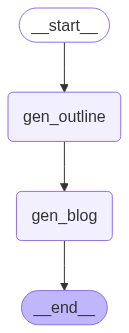

In [16]:
# compile and crete workflow
workflow = graph.compile()
workflow

In [17]:
# execute workflow
initial_state = {"topic": "AI Changing the World"}
output_state = workflow.invoke(initial_state)
output_state

{'topic': 'AI Changing the World',
 'outline': 'Here is a suggested outline for a blog on the topic "AI Changing the World":\n\n**I. Introduction**\n\n* Brief overview of the impact of AI on society\n* Thesis statement: AI is revolutionizing the world in various ways, transforming industries, and improving lives.\n\n**II. Medical Breakthroughs**\n\n* AI-assisted diagnosis and treatment\n* Personalized medicine and patient care\n* Examples of successful AI applications in healthcare (e.g., IBM\'s Watson, AI-powered diagnostic tools)\n\n**III. Automation and Efficiency**\n\n* AI-powered robots and machines in manufacturing and logistics\n* Enhanced productivity and reduced costs\n* Examples of industries where AI has increased efficiency (e.g., customer service, inventory management)\n\n**IV. Environmental Sustainability**\n\n* AI-powered monitoring and prediction of natural disasters\n* Smart grids and energy management\n* AI-assisted conservation efforts (e.g., wildlife tracking, clima

In [19]:
print("TOPIC\n", "-"*10, "\n", output_state["topic"], "\n")
print("OUTLINE\n", "-"*10, "\n", output_state["outline"], "\n")
print("BLOG\n", "-"*10, "\n", output_state["blog"], "\n")

TOPIC
 ---------- 
 AI Changing the World 

OUTLINE
 ---------- 
 Here is a suggested outline for a blog on the topic "AI Changing the World":

**I. Introduction**

* Brief overview of the impact of AI on society
* Thesis statement: AI is revolutionizing the world in various ways, transforming industries, and improving lives.

**II. Medical Breakthroughs**

* AI-assisted diagnosis and treatment
* Personalized medicine and patient care
* Examples of successful AI applications in healthcare (e.g., IBM's Watson, AI-powered diagnostic tools)

**III. Automation and Efficiency**

* AI-powered robots and machines in manufacturing and logistics
* Enhanced productivity and reduced costs
* Examples of industries where AI has increased efficiency (e.g., customer service, inventory management)

**IV. Environmental Sustainability**

* AI-powered monitoring and prediction of natural disasters
* Smart grids and energy management
* AI-assisted conservation efforts (e.g., wildlife tracking, climate mod